## Poisson distribution

__Lets generate Poisson sample of different ${\bf{n}}$ with ${\bf{\lambda = 5}}$:__


In [1]:
from scipy.stats import laplace,poisson
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pylab as pylab
import seaborn as sns
sns.set()
import pandas as pd 
import scipy.stats as sts

In [2]:
p_lambda = 5
sample_5,sample_10,sample_100,sample_1000,sample_100000 = [],[],[],[],[]

for i in range(5):
    sample_5.append(poisson.rvs(p_lambda, size=5))
    sample_10.append(poisson.rvs(p_lambda, size=10))
    sample_100.append(poisson.rvs(p_lambda, size=100))
    sample_1000.append(poisson.rvs(p_lambda, size=1000))
    sample_100000.append(poisson.rvs(p_lambda, size=100000))

In [3]:
print(sample_5)

[array([5, 6, 4, 5, 7]), array([7, 4, 4, 8, 7]), array([4, 4, 8, 4, 6]), array([2, 7, 9, 5, 4]), array([3, 6, 4, 4, 2])]


In [4]:
print(sample_10)

[array([5, 1, 8, 6, 5, 5, 9, 2, 3, 5]), array([7, 4, 6, 6, 6, 1, 4, 4, 3, 2]), array([8, 8, 3, 3, 8, 3, 3, 3, 9, 1]), array([6, 9, 7, 5, 6, 3, 4, 8, 2, 6]), array([ 3,  1,  6,  5, 11,  6,  8,  5,  6,  5])]


__Empirical function and distributin function for different__ ${\bf{n}}$

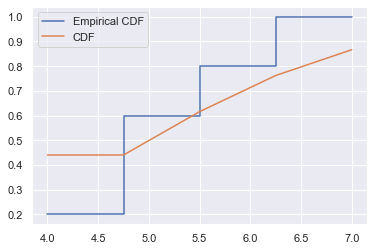

In [5]:
from statsmodels.distributions.empirical_distribution import ECDF
#Empirical CDF for n = 5
ecdf_5 = ECDF(sample_5[0])
x = np.linspace(min(sample_5[0]), max(sample_5[0]), num=len(sample_5[0]))
y_ecdf = ecdf_5(x)
plt.gca().step(x, y_ecdf, label='Empirical CDF')
#CDF for n = 5
y_cdf_5 = poisson.cdf(x, 5)
plt.gca().plot(x, y_cdf_5, label='CDF')
plt.legend()

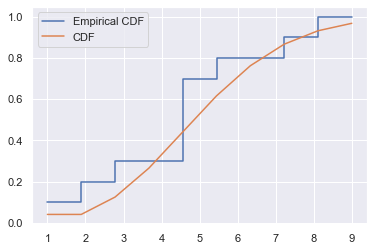

In [6]:
#Empirical CDF for n = 10
ecdf_10 = ECDF(sample_10[0])
x = np.linspace(min(sample_10[0]), max(sample_10[0]), num=len(sample_10[0]))
y = ecdf_10(x)
plt.step(x, y, label='Empirical CDF')

#CDF for n = 10
y_cdf_10 = poisson.cdf(x, 5)
plt.gca().plot(x, y_cdf_10, label='CDF')
plt.legend()

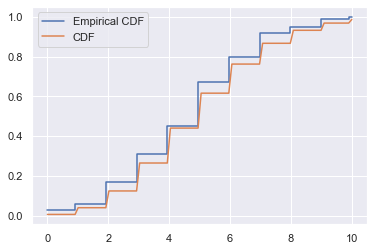

In [7]:
#Empirical CDF for n = 100
ecdf_100 = ECDF(sample_100[0])
x = np.linspace(min(sample_100[0]), max(sample_100[0]), num=len(sample_100[0]))
y = ecdf_100(x)
plt.step(x, y, label='Empirical CDF')


#CDF for n = 100
y_cdf_100 = poisson.cdf(x, 5)
plt.gca().plot(x, y_cdf_100, label='CDF')
plt.legend()

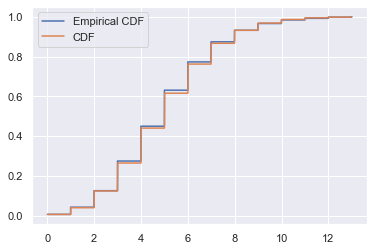

In [8]:
#Empirical CDF for n = 1000
ecdf_1000 = ECDF(sample_1000[0])
x = np.linspace(min(sample_1000[0]),
                max(sample_1000[0]),
                num=len(sample_1000[0]))
y = ecdf_1000(x)
plt.step(x, y, label='Empirical CDF')

#CDF for n = 1000
y_cdf_1000 = poisson.cdf(x, 5)
plt.gca().plot(x, y_cdf_1000, label='CDF')
plt.legend()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


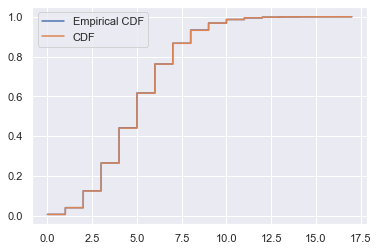

In [9]:
#Empirical CDF for n = 100000
ecdf_100000 = ECDF(sample_100000[0])
x = np.linspace(min(sample_100000[0]),
                max(sample_100000[0]),
                num=len(sample_100000[0]))
y_ecdf100000 = ecdf_100000(x)
plt.step(x, y_ecdf100000, label='Empirical CDF')

#CDF for n = 100000
y_cdf_100000 = poisson.cdf(x, 5)
plt.gca().plot(x, y_cdf_100000, label='CDF')
plt.legend()

__Finding the upper limit of the difference of each pair for different samples__

In [10]:
def lims(pop,sop):
    poisson_rv = sts.poisson(5)
    a=poisson_rv.rvs(pop)
    srt=np.sort(a)
    x2 = []
    y2 = []
    y = 0
    mon=dict()
    k=0
    for x in srt:
        if x in mon.keys():
            mon[x]+=1
        else:
            mon[x]=1
    for key,val in mon.items():
        k+=(1*val)/len(a)
        x2.append(key)
        y2.append(k)
    poisson_rv1 = sts.poisson(5)
    b=poisson_rv1.rvs(sop)
    srt1=np.sort(b)
    x3=  []
    y3= []
    y = 0
    mon1=dict()
    k=0
    for x in srt1:
        if x in mon1.keys():
            mon1[x]+=1
        else:
            mon1[x]=1
    for key,val in mon1.items():
        k+=(1*val)/len(b)
        x3.append(key)
        y3.append(k)
    b=zip(x2,y2)
    n=zip(x3,y3)
    dt=dict()
    ans=[]
    for i in b:
        dt[i[0]]=i[1]
    for i in n:
        if i[0] in dt.keys():
            ans.append(abs(dt[i[0]]-i[1]))
    return(np.round(max(ans),4))

In [11]:
ls1 = [5,10,100,1000,100000]
ls2 = [5,10,100,1000,100000]
for i in ls1:
    for j in ls2:
        res = lims(i,j)
        print('Max for samples {} - {} is {}'.format(i,j,res))

Max for samples 5 - 5 is 0.0
Max for samples 5 - 10 is 0.9
Max for samples 5 - 100 is 0.29
Max for samples 5 - 1000 is 0.336
Max for samples 5 - 100000 is 0.1846
Max for samples 10 - 5 is 0.4
Max for samples 10 - 10 is 0.3
Max for samples 10 - 100 is 0.17
Max for samples 10 - 1000 is 0.243
Max for samples 10 - 100000 is 0.1606
Max for samples 100 - 5 is 0.22
Max for samples 100 - 10 is 0.27
Max for samples 100 - 100 is 0.12
Max for samples 100 - 1000 is 0.088
Max for samples 100 - 100000 is 0.0421
Max for samples 1000 - 5 is 0.25
Max for samples 1000 - 10 is 0.071
Max for samples 1000 - 100 is 0.135
Max for samples 1000 - 1000 is 0.021
Max for samples 1000 - 100000 is 0.0316
Max for samples 100000 - 5 is 0.1349
Max for samples 100000 - 10 is 0.1651
Max for samples 100000 - 100 is 0.0956
Max for samples 100000 - 1000 is 0.0178
Max for samples 100000 - 100000 is 0.0089


__Creating variation series__

In [12]:
def sorted_sample(x):
    s = []
    for i in (x):
        s.append(sorted(i))
    return s


sorted_5 = sorted_sample(sample_5)
sorted_10 = sorted_sample(sample_10)
sorted_100 = sorted_sample(sample_100)
sorted_1000 = sorted_sample(sample_1000)
sorted_100000 = sorted_sample(sample_100000)

In [13]:
for i in sorted_5:
    print(i)

[4, 5, 5, 6, 7]
[4, 4, 7, 7, 8]
[4, 4, 4, 6, 8]
[2, 4, 5, 7, 9]
[2, 3, 4, 4, 6]


In [14]:
for i in sorted_10:
    print(i)

[1, 2, 3, 5, 5, 5, 5, 6, 8, 9]
[1, 2, 3, 4, 4, 4, 6, 6, 6, 7]
[1, 3, 3, 3, 3, 3, 8, 8, 8, 9]
[2, 3, 4, 5, 6, 6, 6, 7, 8, 9]
[1, 3, 5, 5, 5, 6, 6, 6, 8, 11]


__Lets count quantiles__

In [15]:
level = [0.1, 0.5, 0.7]
def statss(x):
    lsts = []
    for i in level:
        lsts.append(x[0][round(len(x[0]) * i + 1)])
    print(lsts)


statss(sorted_5)
statss(sorted_10)
statss(sorted_100)
statss(sorted_1000)
statss(sorted_100000)


[5, 7, 7]
[3, 5, 8]
[2, 5, 6]
[2, 5, 6]
[2, 5, 6]


__Theoritical quantiles__


In [16]:
level = [0.1, 0.5, 0.7]
def theo_qu(x):
    quant =[]
    for i in level:
        k = round(i*(len(x[0])-1))
        if k == len(x) - 1:
            t = x[0][k]
        else:
            t = x[0][k+1]
        if k+1<i*len(x[0]):
            quant.append(x[0][t])
        elif k+1 == i*len(x[0]):
            quant.append((x[0][k]+t)/2 )
        elif k+1> i*len(x[0]):
            quant.append(x[0][k])
    print(quant)

In [17]:
theo_qu(sorted_5)
theo_qu(sorted_10)
theo_qu(sorted_100)
theo_qu(sorted_1000)
theo_qu(sorted_100000)

[4, 5, 6]
[2, 5.0, 5.5]
[2, 5, 6.0]
[2, 5, 6.0]
[2, 5, 6.0]


__Vizualization of histogram and density polygon__


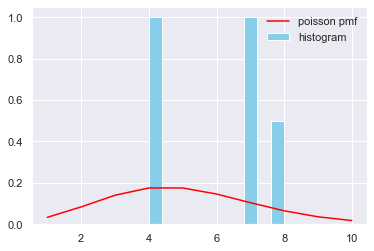

In [18]:
#n = 5
#histogram
pmf_5 = np.arange(poisson.ppf(0.01, p_lambda), poisson.ppf(0.99, p_lambda))
fig, ax = plt.subplots()
plt.gca().plot(pmf_5,
               poisson.pmf(pmf_5, p_lambda),
               ms=5,
               label='poisson pmf',
               color='red')
plt.gca().hist(sample_5[1],density = True, label='histogram', color="skyblue")
plt.legend(frameon=False)

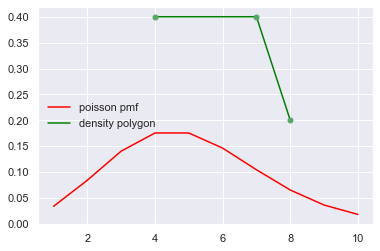

In [19]:
#n = 5
#density polygon
pol_5 = np.unique(sample_5[1], return_counts=True)
x_5 = pol_5[0]
y_5 = pol_5[1]
plt.plot(pmf_5,
         poisson.pmf(pmf_5, p_lambda),
         ms=8,
         label='poisson pmf',
         color='red')
plt.gca().plot(x_5,
               y_5 / len(sample_5[1]),
               label='density polygon',
               color='green')
plt.gca().plot(x_5, y_5 / len(sample_5[1]), 'go', ms=5)
plt.legend(frameon=False)

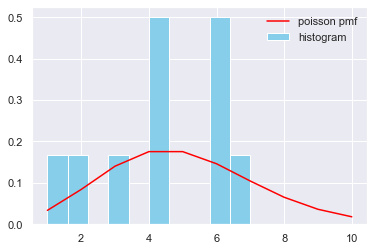

In [20]:
#n = 10
#histogram
pmf_10 = np.arange(poisson.ppf(0.01, p_lambda), poisson.ppf(0.99, p_lambda))
plt.gca().plot(pmf_10,
               poisson.pmf(pmf_10, p_lambda),
               ms=5,
               label='poisson pmf',
               color='red')
plt.gca().hist(sample_10[1], density=1, label='histogram', color="skyblue")
plt.legend(frameon=False)

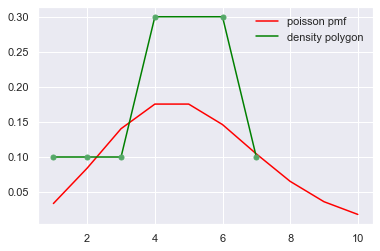

In [21]:
#n = 10
#density polygon
pol_10 = np.unique(sample_10[1], return_counts=True)
x_10 = pol_10[0]
y_10 = pol_10[1]
plt.plot(pmf_10,
         poisson.pmf(pmf_10, p_lambda),
         ms=8,
         label='poisson pmf',
         color='red')
plt.gca().plot(x_10,
               y_10 / len(sample_10[1]),
               label='density polygon',
               color='green')
plt.gca().plot(x_10, y_10 / len(sample_10[1]), 'go', ms=5)
plt.legend(frameon=False)

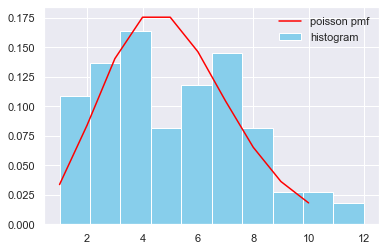

In [22]:
#n = 100
#histogram
pmf_100 = np.arange(poisson.ppf(0.01, p_lambda), poisson.ppf(0.99, p_lambda))
plt.gca().plot(pmf_100,
               poisson.pmf(pmf_100, p_lambda),
               ms=5,
               label='poisson pmf',
               color='red')
plt.gca().hist(sample_100[1], density=True, label='histogram', color="skyblue")
plt.legend(frameon=False)

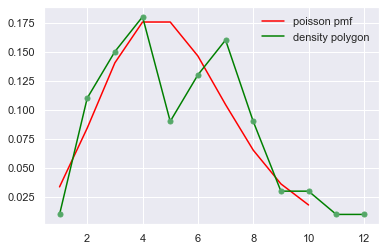

In [23]:
#n = 100
#density polygon
pol_100 = np.unique(sample_100[1], return_counts=True)
x_100 = pol_100[0]
y_100 = pol_100[1]
plt.plot(pmf_100,
         poisson.pmf(pmf_100, p_lambda),
         ms=8,
         label='poisson pmf',
         color='red')
plt.gca().plot(x_100,
               y_100 / len(sample_100[1]),
               label='density polygon',
               color='green')
plt.gca().plot(x_100, y_100 / len(sample_100[1]), 'go', ms=5)
plt.legend(frameon=False)

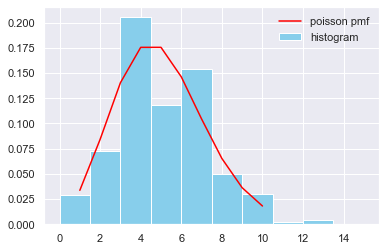

In [24]:
#n = 1000
pmf_1000 = np.arange(poisson.ppf(0.01, p_lambda), poisson.ppf(0.99, p_lambda))
plt.gca().plot(pmf_1000,
               poisson.pmf(pmf_1000, p_lambda),
               ms=5,
               label='poisson pmf',
               color='red')
plt.gca().hist(sample_1000[1],
               density=True,
               label='histogram',
               color="skyblue")

plt.legend(frameon=False)

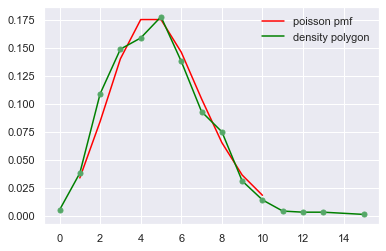

In [25]:
#n = 1000
#density polygon
pol_1000 = np.unique(sample_1000[1], return_counts=True)
x_1000 = pol_1000[0]
y_1000 = pol_1000[1]
plt.plot(pmf_1000,
         poisson.pmf(pmf_1000, p_lambda),
         ms=8,
         label='poisson pmf',
         color='red')
plt.gca().plot(x_1000,
               y_1000 / len(sample_1000[1]),
               label='density polygon',
               color='green')
plt.gca().plot(x_1000, y_1000 / len(sample_1000[1]), 'go', ms=5)
plt.legend(frameon=False)

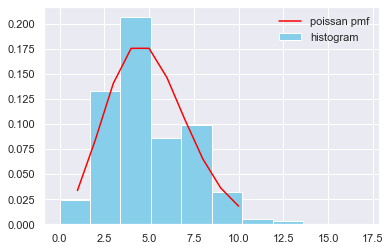

In [26]:
#n = 100000
pmf_100000 = np.arange(poisson.ppf(0.01, p_lambda),
                        poisson.ppf(0.99, p_lambda))
plt.gca().plot(pmf_100000,
               poisson.pmf(pmf_100000, p_lambda),
               ms=5,
               label='poissan pmf',
               color='red')
plt.gca().hist(sample_100000[1],
               density=True,
               label='histogram',
               color="skyblue")
plt.legend(frameon=False)

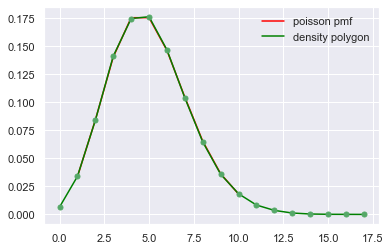

In [27]:
#n = 100
#density polygon
pol_100000 = np.unique(sample_100000[1], return_counts=True)
x_100000 = pol_100000[0]
y_100000 = pol_100000[1]
plt.plot(pmf_100000,
         poisson.pmf(pmf_100000, p_lambda),
         ms=8,
         label='poisson pmf',
         color='red')
plt.gca().plot(x_100000,
               y_100000 / len(sample_100000[1]),
               label='density polygon',
               color='green')
plt.gca().plot(x_100000, y_100000 / len(sample_100000[1]), 'go', ms=5)
plt.legend(frameon=False)

__Laplace distribution with__ ${\bf{\lambda =1,\mu = 5}}$

In [28]:
lpl_mu = 5
lpl_lam = 1
sample_5,sample_10,sample_100,sample_1000,sample_100000 = [],[],[],[],[]

for i in range(5):
    sample_5.append(laplace.rvs(scale=lpl_lam, loc=lpl_mu, size=5))
    sample_10.append(laplace.rvs(scale=lpl_lam, loc=lpl_mu, size=10))
    sample_100.append(
        laplace.rvs( scale=lpl_lam, loc=lpl_mu, size=100))
    sample_1000.append(
        laplace.rvs(scale=lpl_lam, loc=lpl_mu, size=1000))
    sample_100000.append(
        laplace.rvs(scale=lpl_lam, loc=lpl_mu, size=100000))

In [29]:
print(np.round(sample_5,3))

[[5.973 4.606 6.395 6.083 6.094]
 [4.59  6.994 4.642 4.859 4.342]
 [5.564 2.541 2.797 5.011 5.385]
 [4.102 6.133 4.621 5.104 5.743]
 [2.342 5.016 5.21  8.297 5.107]]


In [30]:
print(np.round(sample_10,3))

[[ 7.456  5.026  5.668  1.879  6.585  5.515  5.566  4.596  4.715  4.899]
 [ 6.367  5.338  3.136  4.506  5.454  5.088  5.     5.456  5.052  3.342]
 [ 5.     4.186  6.822  4.217  6.358  5.756  5.744  4.67   2.982  6.178]
 [-0.569  4.327  4.772  7.82   5.559  3.765  5.581  3.743  3.044  5.323]
 [ 6.388  4.54   6.109  5.139  6.382  5.751  3.871  4.313  5.397  5.275]]


__Empirical function and distributin function for different__ ${\bf{n}}$

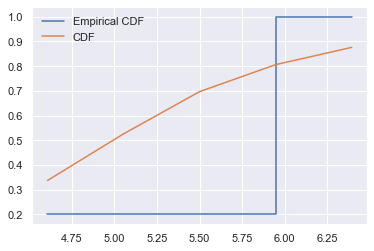

In [31]:
#Empirical CDF for n = 5
ecdf_5 = ECDF(sample_5[0])
x = np.linspace(min(sample_5[0]), max(sample_5[0]), num=len(sample_5[0]))
y_ecdf = ecdf_5(x)
plt.gca().step(x, y_ecdf, label='Empirical CDF')
#CDF for n = 5
y_cdf_5 = laplace.cdf(x, 5)
plt.gca().plot(x, y_cdf_5, label='CDF')
plt.legend(frameon = False)

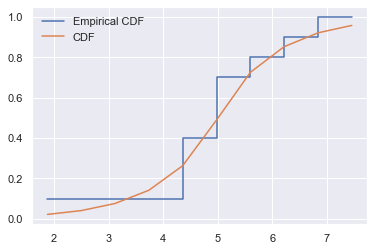

In [32]:
#Empirical CDF for n = 10
ecdf_10 = ECDF(sample_10[0])
x = np.linspace(min(sample_10[0]), max(sample_10[0]), num=len(sample_10[0]))
y = ecdf_10(x)
plt.step(x, y, label='Empirical CDF')

#CDF for n = 10
y_cdf_10 = laplace.cdf(x, 5)
plt.gca().plot(x, y_cdf_10, label='CDF')
plt.legend(frameon=False)

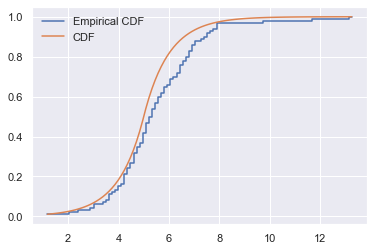

In [33]:
#Empirical CDF for n = 100
ecdf_100 = ECDF(sample_100[0])
x = np.linspace(min(sample_100[0]), max(sample_100[0]), num=len(sample_100[0]))
y = ecdf_100(x)
plt.step(x, y, label='Empirical CDF')

#CDF for n = 100
y_cdf_100 = laplace.cdf(x, 5)
plt.gca().plot(x, y_cdf_100, label='CDF')
plt.legend(frameon=False)

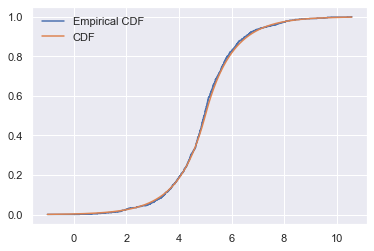

In [34]:
#Empirical CDF for n = 1000
ecdf_1000 = ECDF(sample_1000[0])
x = np.linspace(min(sample_1000[0]),
                max(sample_1000[0]),
                num=len(sample_1000[0]))
y = ecdf_1000(x)
plt.step(x, y, label='Empirical CDF')

#CDF for n = 1000
y_cdf_1000 = laplace.cdf(x, 5)
plt.gca().plot(x, y_cdf_1000, label='CDF')
plt.legend(frameon=False)


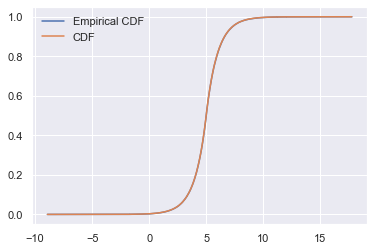

In [35]:
#Empirical CDF for n = 100000
ecdf_100000 = ECDF(sample_100000[0])
x = np.linspace(min(sample_100000[0]),
                max(sample_100000[0]),
                num=len(sample_100000[0]))
y_ecdf100000 = ecdf_100000(x)
plt.step(x, y_ecdf100000, label='Empirical CDF')

#CDF for n = 100000
y_cdf_100000 = laplace.cdf(x, 5)
plt.gca().plot(x, y_cdf_100000, label='CDF')
plt.legend(frameon=False)

__Creating variation series__

In [36]:
def sorted_sample(x):
    s = []
    for i in (x):
        s.append(sorted(i))
    return s


sorted_5 = sorted_sample(sample_5)
sorted_10 = sorted_sample(sample_10)
sorted_100 = sorted_sample(sample_100)
sorted_1000 = sorted_sample(sample_1000)
sorted_100000 = sorted_sample(sample_100000)

In [37]:
for i in sorted_5:
    print(np.round(i, 3))

[4.606 5.973 6.083 6.094 6.395]
[4.342 4.59  4.642 4.859 6.994]
[2.541 2.797 5.011 5.385 5.564]
[4.102 4.621 5.104 5.743 6.133]
[2.342 5.016 5.107 5.21  8.297]


In [38]:
for i in sorted_10:
    print(np.round(i, 3))

[1.879 4.596 4.715 4.899 5.026 5.515 5.566 5.668 6.585 7.456]
[3.136 3.342 4.506 5.    5.052 5.088 5.338 5.454 5.456 6.367]
[2.982 4.186 4.217 4.67  5.    5.744 5.756 6.178 6.358 6.822]
[-0.569  3.044  3.743  3.765  4.327  4.772  5.323  5.559  5.581  7.82 ]
[3.871 4.313 4.54  5.139 5.275 5.397 5.751 6.109 6.382 6.388]


__Lets count quantiles__

In [39]:
level = [0.1, 0.5, 0.7]
def statss(x):
    lsts = []
    for i in level:
        lsts.append(x[0][round(len(x[0]) * i + 1)])
    print(np.round(lsts,3))


statss(sorted_5)
statss(sorted_10)
statss(sorted_100)
statss(sorted_1000)
statss(sorted_100000)


[6.083 6.395 6.395]
[4.715 5.566 6.585]
[3.788 5.35  6.415]
[3.464 4.973 5.484]
[3.391 5.005 5.518]


__Theoritical quantiles__


In [40]:
level = [0.1, 0.5, 0.7]
def theo_qu(x):
    quant =[]
    for i in level:
        k = round(i*(len(x[0])-1))
        if k == len(x) - 1:
            t = x[0][k]
        else:
            t = x[0][k+1]
        if k+1<i*len(x[0]):
            quant.append(x[0][t])
        elif k+1 == i*len(x[0]):
            quant.append((x[0][k]+t)/2 )
        elif k+1> i*len(x[0]):
            quant.append(x[0][k])
    print(np.round(quant,3))

In [41]:
theo_qu(sorted_5)
theo_qu(sorted_10)
theo_qu(sorted_100)
theo_qu(sorted_1000)
theo_qu(sorted_100000)

[4.606 6.083 6.094]
[4.596 5.026 5.617]
[3.731 5.335 6.285]
[3.444 4.971 5.478]
[3.391 5.005 5.518]


__Vizualization of histogram and density polygon__


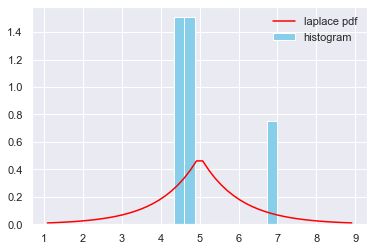

In [42]:
#n = 5
#histogram
pdf_5 = np.linspace(laplace.ppf(0.01, 5), laplace.ppf(0.99, 5))
plt.gca().plot(pdf_5,
               laplace.pdf(pdf_5, 5),
               ms=5,
               label='laplace pdf',
               color='red')
plt.gca().hist(sample_5[1],density = True, label='histogram', color="skyblue")
plt.legend(frameon=False)

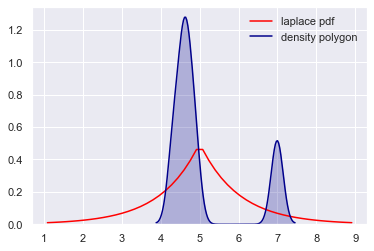

In [43]:
#n = 5
#density polygon
pol_5 = np.unique(sample_5[1], return_counts=True)
x_5 = pol_5[0]
y_5 = pol_5[1]
plt.gca().plot(pdf_5,
               laplace.pdf(pdf_5, 5),
               ms=5,
               label='laplace pdf',
               color='red')

sns.kdeplot(sample_5[1], color='darkblue', label='density polygon', shade=True)
plt.legend(frameon=False)

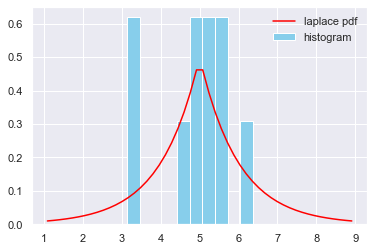

In [44]:
#n = 10
#histogram
pdf_10 = np.linspace(laplace.ppf(0.01, 5), laplace.ppf(0.99, 5))
plt.gca().plot(pdf_10,
               laplace.pdf(pdf_10, 5),
               ms=5,
               label='laplace pdf',
               color='red')
plt.gca().hist(sample_10[1], density=1, label='histogram', color="skyblue")
plt.legend(frameon = False)

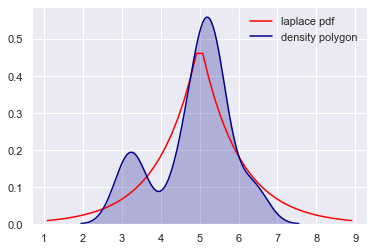

In [45]:
#n = 10
#density polygon
pol_10 = np.unique(sample_10[1], return_counts=True)
x_10 = pol_10[0]
y_10 = pol_10[1]
plt.plot(pdf_5, laplace.pdf(pdf_5, 5), ms=5, label='laplace pdf', color='red')

sns.kdeplot(sample_10[1],
            color='darkblue',
            label='density polygon',
            shade=True)

plt.legend(frameon=False)

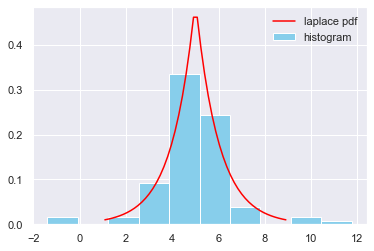

In [46]:
#n = 100
#histogram
pdf_100 = np.linspace(laplace.ppf(0.01, 5), laplace.ppf(0.99, 5))
plt.gca().plot(pdf_100,
               laplace.pdf(pdf_100, 5),
               ms=5,
               label='laplace pdf',
               color='red')
plt.gca().hist(sample_100[1], density=True, label='histogram', color="skyblue")
plt.legend(frameon = False)

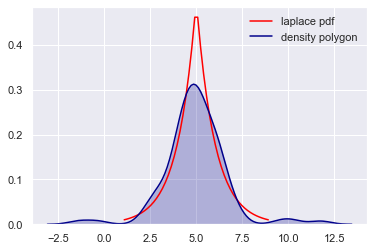

In [47]:
#n = 100
#density polygon
pol_100 = np.unique(sample_100[1], return_counts=True)
x_100 = pol_100[0]
y_100 = pol_100[1]
plt.plot(pdf_5,
               laplace.pdf(pdf_5, 5),
               ms=5,
               label='laplace pdf',
               color='red')

sns.kdeplot(sample_100[1],
            color='darkblue',
            label='density polygon',
            shade=True)
plt.legend(frameon = False)

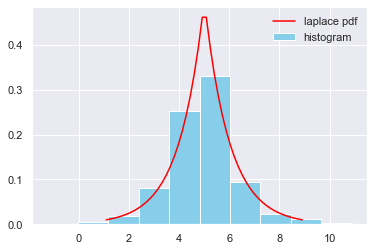

In [48]:
#n = 1000
pdf_1000 = np.linspace(laplace.ppf(0.01, 5), laplace.ppf(0.99, 5))
plt.gca().plot(pdf_1000,
               laplace.pdf(pdf_1000, 5),
               ms=5,
               label='laplace pdf',
               color='red')
plt.gca().hist(sample_1000[1],
               density=True,
               label='histogram',
               color="skyblue")

plt.legend(frameon = False)

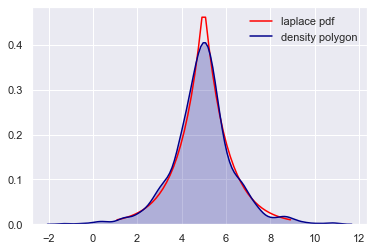

In [49]:
#n = 1000
#density polygon
pol_1000 = np.unique(sample_1000[1], return_counts=True)
x_1000 = pol_1000[0]
y_1000 = pol_1000[1]
plt.plot(pdf_5,
               laplace.pdf(pdf_5, 5),
               ms=5,
               label='laplace pdf',
               color='red')
sns.kdeplot(sample_1000[1],
            color='darkblue',
            label='density polygon',
            shade=True)
plt.legend(frameon = False)

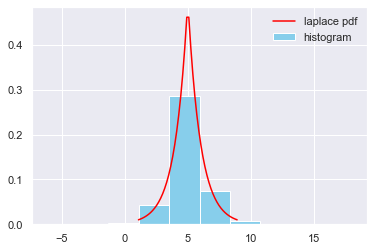

In [50]:
#n = 100000
pdf_100000 = np.linspace(laplace.ppf(0.01, 5), laplace.ppf(0.99, 5))
plt.gca().plot(pdf_100000,
               laplace.pdf(pdf_100000, 5),
               ms=5,
               label='laplace pdf',
               color='red')
plt.gca().hist(sample_100000[1],
               density=True,
               label='histogram',
               color="skyblue")
plt.legend(frameon=False)

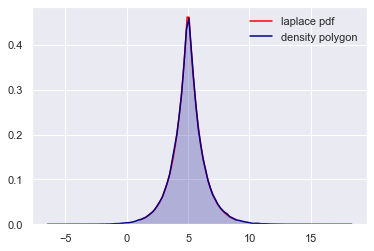

In [55]:
#n = 100000
#density polygon
pol_100000 = np.unique(sample_100000[1], return_counts=True)
x_100000 = pol_100000[0]
y_100000 = pol_100000[1]
plt.plot(pdf_100000,
               laplace.pdf(pdf_100000, 5),
               ms=5,
               label='laplace pdf',
               color='red')
sns.kdeplot(sample_100000[1],
            color='darkblue',
            label='density polygon',
            shade=True,)
plt.legend(frameon = False)